In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm

from spatgame import evolve, evolve_old, make_rgb
from meangame import MeanGamePy as MeanGame
from game import GameField as SelfGame

In [2]:
plt.style.use("seaborn-whitegrid")
plt.rcParams["axes.grid"] = False

In [24]:
field = game.field

In [12]:
new_field = np.vstack((np.hstack((field, field)), np.hstack((field, field))))

In [13]:
field = new_field

In [14]:
field = field.astype("long")

In [46]:
field[:50, :50] = 1

In [15]:
field2 = field.copy()

<IPython.core.display.Javascript object>


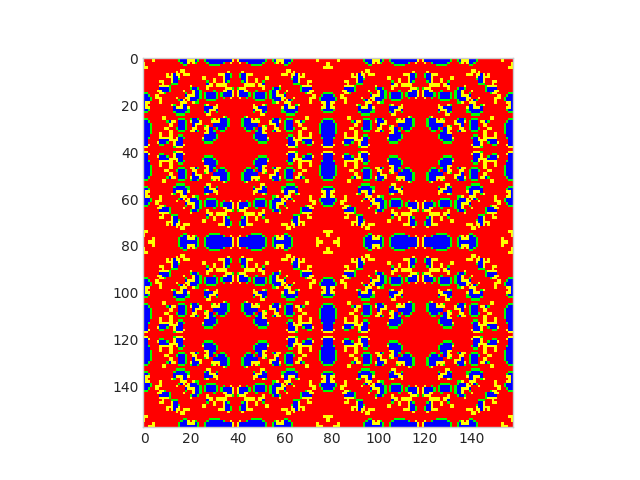

In [16]:
fig = plt.figure()
im = plt.imshow(make_rgb(field), animated=True, cmap=plt.get_cmap('Paired'))
# ax.grid(False)
# updater function
def updatefig(frame):
    if frame < 3:
        return im,
    global field
    field_ = evolve(field, b, 1)
    coll = make_rgb(field_ + 2*(field_-field))
    field = field_.copy()
    im.set_array(coll)
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=150, blit=True)

plt.show()

<IPython.core.display.Javascript object>


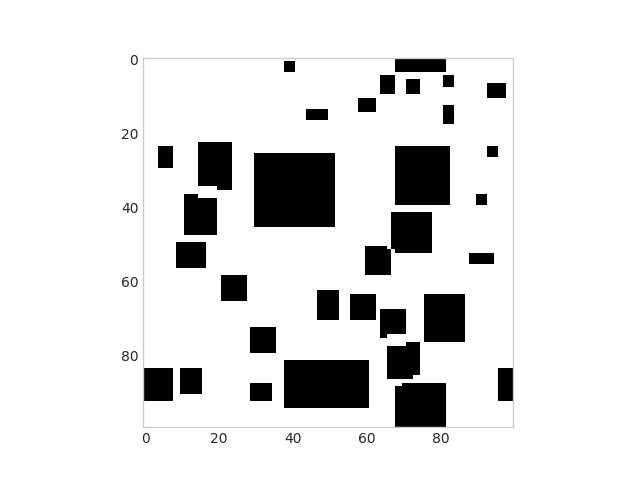

In [23]:
plt.imshow(game.field)

<IPython.core.display.Javascript object>


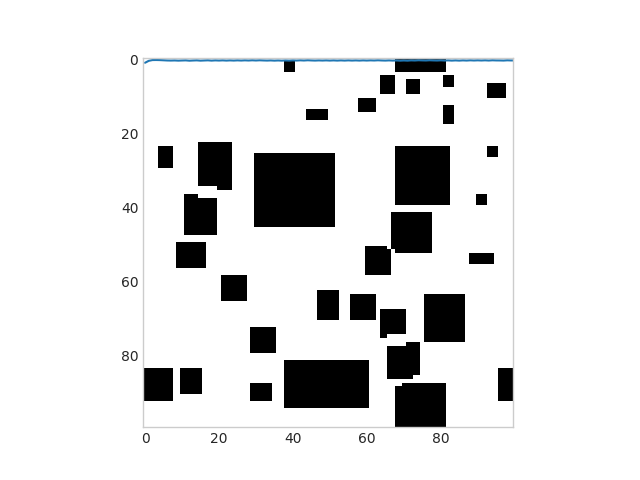

In [17]:
plt.plot(game.densities)

In [ ]:
plt.fill_between()

<IPython.core.display.Javascript object>


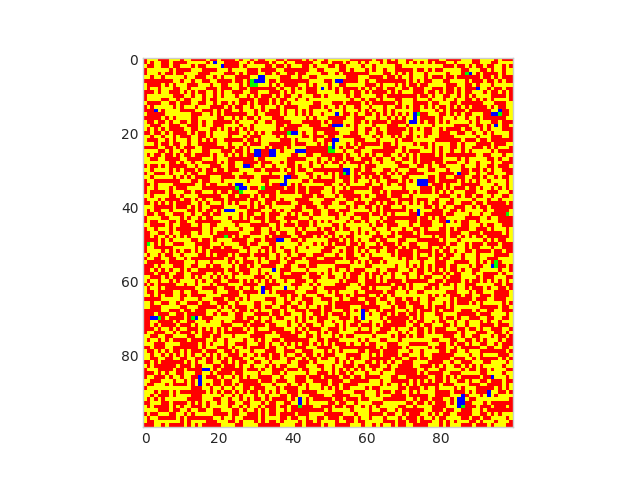

In [17]:
field_ = evolve(field, b, 1)
coll = make_rgb(field_ + 2*(field_-field))
plt.imshow(coll)
field = field_

<IPython.core.display.Javascript object>


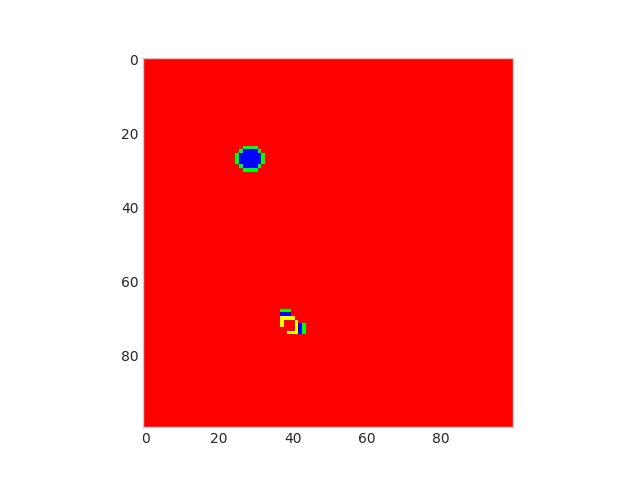

In [11]:
plt.imshow(coll)
# plt.savefig("figures/snapshot_b={}.jpg".format(b), dpi=500, quality=95)

In [7]:
density_old_raw = np.load("data/density_of_cooperators_old_game.npy")
density_new_raw = np.load("density_of_cooperators_old_game.npy")

density_old = density_old_raw.mean(axis=-1)
density_new = density_new_raw.mean(axis=-1)

std_o = density_old.std(axis=-1)
std_n = density_new.std(axis=-1)

means_o = density_old.mean(axis=-1)
means_n = density_new.mean(axis=-1)

<IPython.core.display.Javascript object>


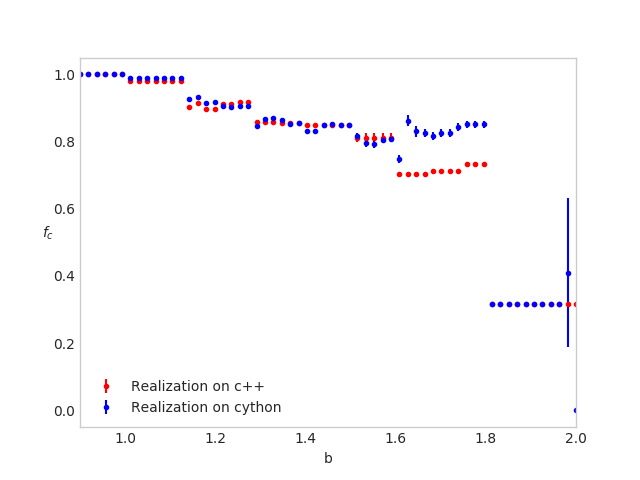

Text(0, 0.5, '$f_c$')

In [8]:
# fig = plt.figure()
plt.xlim(.9, 2)
# plt.suptitle('Средняя плотность кооператоров от $b$', fontsize=16)
plt.errorbar(bs, means_o, yerr=std_o, fmt=".r", label="Realization on c++")
plt.errorbar(bs, means_n, yerr=std_n, fmt=".b", label="Realization on cython")
plt.legend(loc="lower left")
plt.xlabel("b")

plt.ylabel("$f_c$", rotation=0)

In [34]:
np.asarray((field_ + 2*(field_-field)).flat).max()

3

In [22]:
col.

AttributeError: 'numpy.ndarray' object has no attribute 'flatter'

In [13]:
game = MeanGame(200, 1.55)
game.field = np.load("fields/field_200_10.npy")
game.evolve(1000)

<IPython.core.display.Javascript object>


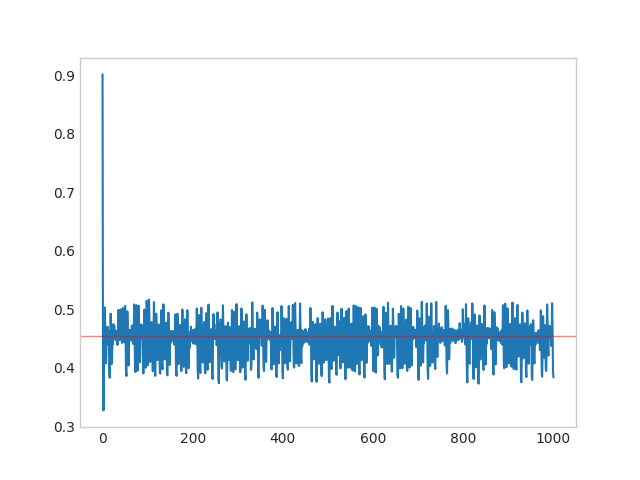

In [14]:
plt.plot(game.densities)
plt.axhline((8-5*1.55)/(1.55-1), linewidth=1, color='r', alpha=.5)

In [8]:
np.square(game.field-np.load("fields/field_100_10.npy")).sum()

0

In [6]:
L = 300
b = 1.5
seed = 57
for p_c in tqdm([.1, .2, .3, .4, .5, .6, .7, .8, .9]):
    den = []
    for seed in seeds:
        d = []
        np.random.seed(seed)
        field = np.random.choice((0, 1), (L, L), p=(1-p_c, p_c))
        for _ in range(int(200)):
            field = evolve(field, b, 1)
            d.append(field.sum()/(1.*field.shape[0]**2))
        den.append(d)
    den = np.asarray(den)
    plt.errorbar(range(200), den.mean(axis=0), yerr=den.mean(axis=0).std(), label="p_c={}".format(p_c))
plt.legend(loc="center right")

  0%|          | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


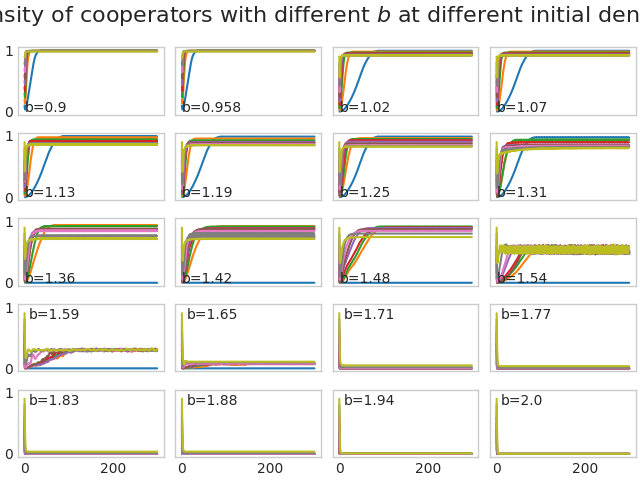

100%|██████████| 20/20 [12:57<00:00, 34.81s/it]


In [6]:
fig, axs = plt.subplots(5, 4, constrained_layout=True, sharex=True, sharey=True)
fig.suptitle('Density of cooperators with different $b$ at different initial density', fontsize=16)
seed = 42
L = 200
for i, b in tqdm(enumerate(np.linspace(.9, 2, 20)), total=20):
#     field = MeanGamePy(L, b)
    for p_c in [.1, .2, .3, .4, .5, .6, .7, .8, .9]:
        d = []
        np.random.seed(seed)
        field = np.random.choice((0, 1), (L, L), p=(1-p_c, p_c))
        d = [field.sum()/(1.*field.shape[0]**2)]
#         d = [1 - field.field.sum()/(1.*field.L**2)]
        for _ in range(int(300)):
            field = evolve(field, b, 1)
#             field.evolveQ(1)
            d.append(field.sum()/(1.*field.shape[0]**2))
        axs[i//4, i % 4].plot(d, label="p_c={}".format(p_c))

    if i > 11:
        axs[i//4, i % 4].text(10, 0.8, "b={:.3}".format(b, fontsize=11))
    else:
        axs[i//4, i % 4].text(0, 0, "b={:.3}".format(b, fontsize=11))

# plt.legend(loc="center right")
plt.show()

In [15]:
fig.savefig("figures/f_c_for_different_b_at_different_initial_f_c.jpg", dpi=500, quality=95)

<IPython.core.display.Javascript object>


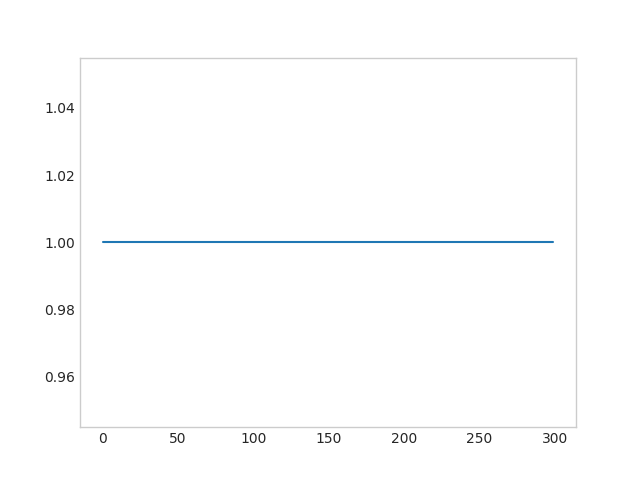

In [10]:
val = []
field = np.random.choice([0, 1], (100, 100), p=[1-p_c, p_c])
field2 = MeanGamePy(100, 1.78)
field2.field = 1 - field
for _ in range(300):
    field = evolve_old(field, 1.79, 1)
    field2.evolveQ(1)
    val.append((field+field2.field).sum()/100**2)
plt.plot(val)

<IPython.core.display.Javascript object>


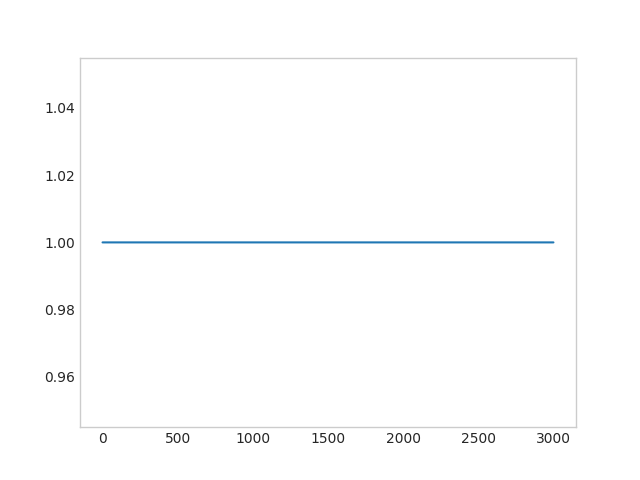

In [17]:
plt.plot(val)

In [12]:
density = []
for s in range(10, 20):
    den = []
    for b in tqdm(np.linspace(1.65, 1.85, 20)):
        d = []
        field = np.load("fields/field_200_{}.npy".format(s))
        field = evolve(field, b, 600)
        for _ in range(0, 1000):
            field = evolve(field, b)
            d.append(field.sum()/(1.*field.shape[0]*field.shape[1]))
        den.append(d)
    density.append(den)

100%|██████████| 20/20 [03:19<00:00,  9.95s/it]


In [12]:
game = MeanGame(100, 1.58)
game.field = np.random.choice([0, 1], [100, 100], p=[.5, .5])

In [13]:
for i in range(20):
    game.evolve(5000)

In [23]:
plt.plot(game.densities[1:].reshape((100, -1)).mean(0)[70:])

<IPython.core.display.Javascript object>

In [7]:
np.save("density_L200_big.npy", np.asarray(density))

In [8]:
density = np.load("density_L200_big.npy")

In [13]:
density = np.asarray(density)

In [14]:
std = density.std(axis=-1)

In [15]:
means = density.mean(axis=-1)

<IPython.core.display.Javascript object>


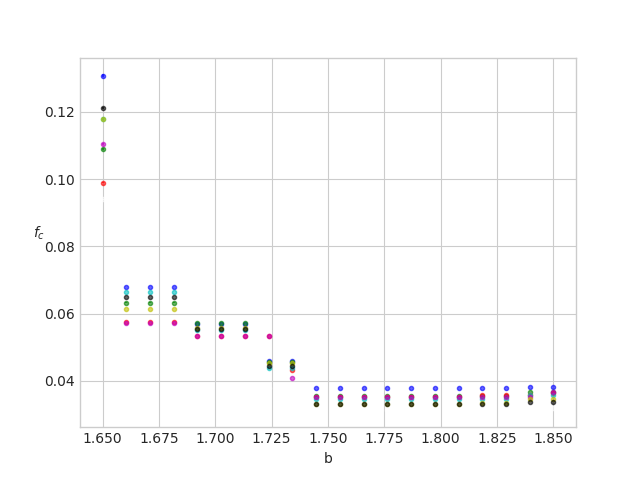

No handles with labels found to put in legend.


Text(0, 0.5, '$f_c$')

In [17]:
for i, c in enumerate(["b", "g", "r", "c", "m", "y", "k", "w"]):
    plt.errorbar(np.linspace(1.65, 1.85, 20), means[i], yerr=std[i], fmt=".{}".format(c), alpha=.6)
plt.legend(loc="upper right")
plt.xlabel("b")
# plt.yticks(np.arange(0., 1.1, .1))
plt.ylabel("$f_c$", rotation=0)
# plt.errorbar([1.650, 1.675, 1.749, 1.751, 1.799, 1.801, 1.851], means2[0], yerr=std2[0], fmt="vb--", label="L=200")
# plt.errorbar([1.7], [np.asarray(dex).mean()], fmt=">y", label="L=500")

<IPython.core.display.Javascript object>


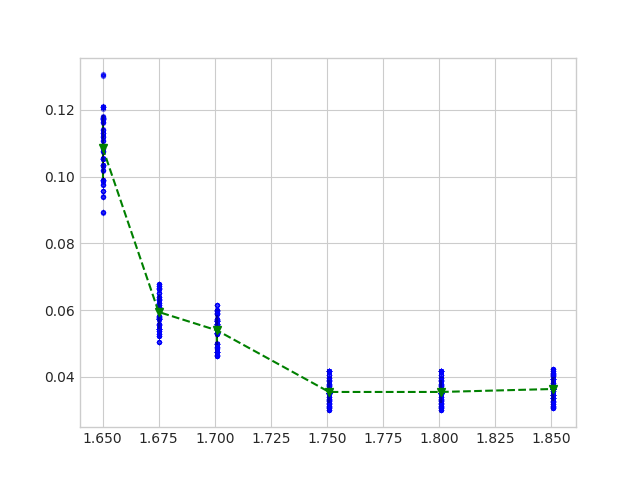

<ErrorbarContainer object of 3 artists>

In [42]:
for i, b in enumerate([1.650, 1.675, 1.701, 1.751, 1.801, 1.851]):
    plt.errorbar([b], density2[0][i], fmt=".b", alpha=0.01)

plt.errorbar(np.array([1.650, 1.675, 1.701, 1.751, 1.801, 1.851]), means2[0], yerr=std2[0], fmt="vg--", label="L=200")

In [ ]:
den2 = []
for j, b in enumerate(bs):
    den = []
    for i in range(0, 3800, 95):
        den.append(np.mean(density[2, j, i:i+95]))
    den2.append(den)

In [25]:
game = MeanGame(100, 1.6)
game.field = np.load("fields/field_100_10.npy")

In [26]:
field = np.load("./fields/field_100_10.npy")
dens = []

In [27]:
%%time
for _ in range(7500):
    field = evolve(field, 1.6, 1)
    dens.append(field.sum()/10000.)

CPU times: user 12.1 s, sys: 31.2 ms, total: 12.1 s
Wall time: 12.6 s


In [24]:
len(dens)

10000

In [28]:
%%time
game.evolve(7500)

CPU times: user 11 s, sys: 31.2 ms, total: 11.1 s
Wall time: 11.4 s


In [23]:
game.densities.shape

(7501,)

In [12]:
np.square(game.field - field).sum()

0

In [13]:
field.sum()/10000., game.field.sum()/10000.

(0.3145, 0.3145)

In [15]:
dens.shape

(30, 40, 8000)

In [10]:
dens = np.load("data/densities_at_185.npy")

<IPython.core.display.Javascript object>


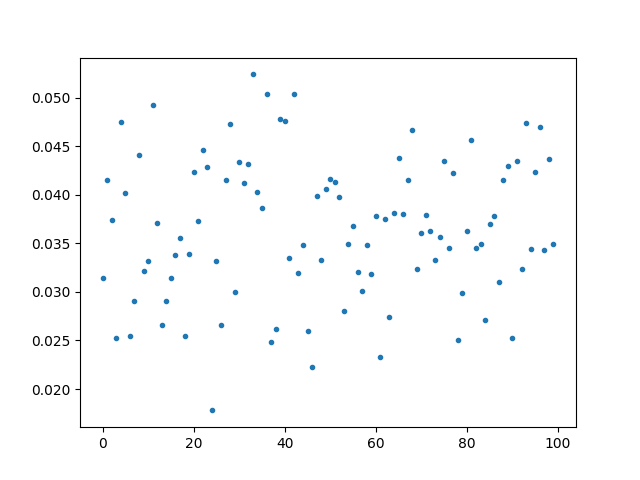

In [11]:
plt.plot(dens[0].mean(axis=-1).flat, ".")

<IPython.core.display.Javascript object>


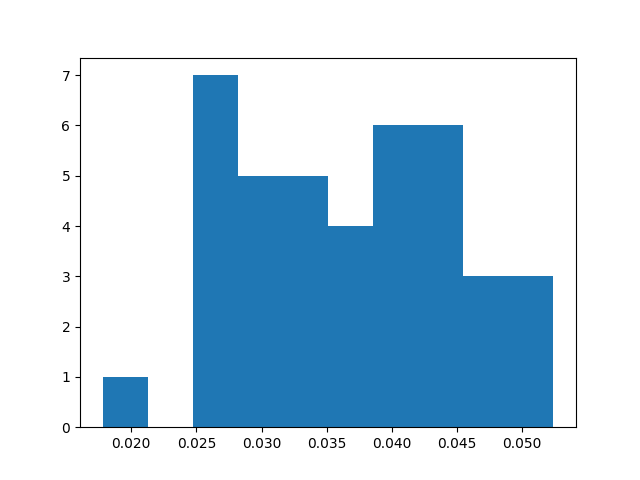

(array([1., 0., 7., 5., 5., 4., 6., 6., 3., 3.]),
 array([0.0178 , 0.02126, 0.02472, 0.02818, 0.03164, 0.0351 , 0.03856,
        0.04202, 0.04548, 0.04894, 0.0524 ]),
 <a list of 10 Patch objects>)

In [9]:
plt.hist(dens[-9].mean(axis=-1).flat)

<IPython.core.display.Javascript object>


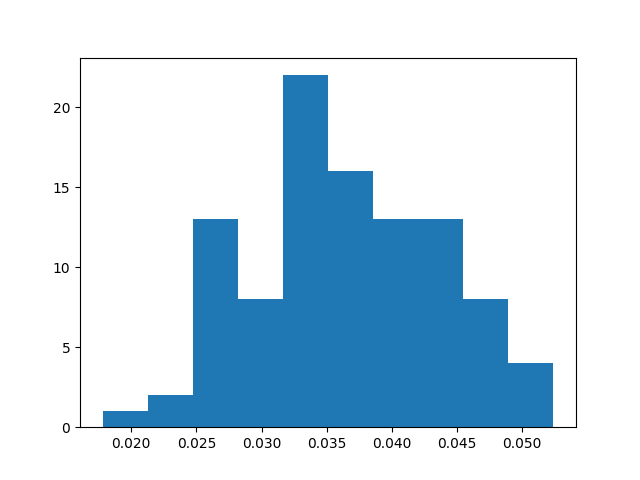

(array([ 1.,  2., 13.,  8., 22., 16., 13., 13.,  8.,  4.]),
 array([0.0178 , 0.02126, 0.02472, 0.02818, 0.03164, 0.0351 , 0.03856,
        0.04202, 0.04548, 0.04894, 0.0524 ]),
 <a list of 10 Patch objects>)

In [12]:
plt.hist(dens[0].mean(axis=-1).flat)

In [9]:
dens.mean(axis=-1).std(axis=-1)

array([0.00889184, 0.00889184, 0.01120578, 0.00513592, 0.00031479,
       0.00092486, 0.00041202, 0.192642  , 0.17047616, 0.15038986,
       0.13203946, 0.13589867, 0.13567025, 0.13607108, 0.1363368 ,
       0.14477586, 0.12636281, 0.11565537, 0.0982473 , 0.0837442 ,
       0.06723418, 0.05191267, 0.0380562 , 0.02165033, 0.00359726,
       0.00026622, 0.00026622, 0.00026622, 0.00026622, 0.00026622])

<IPython.core.display.Javascript object>


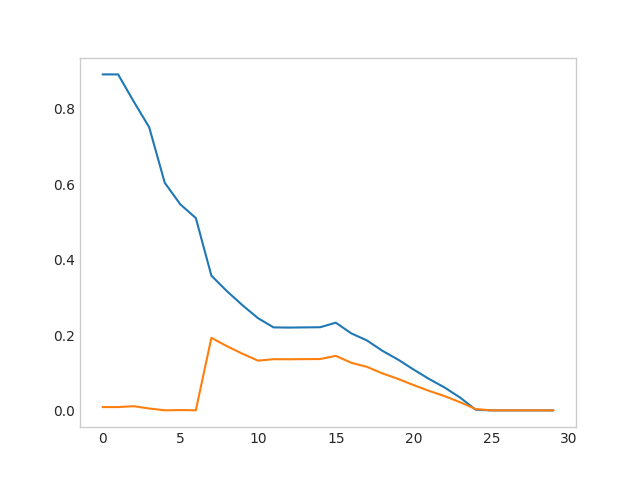

In [43]:
plt.plot(dens.mean(axis=-1)[dens.mean(axis=-1).mean(axis=-1)>0].mean(axis=-1))
plt.plot(dens.mean(axis=-1)[dens.mean(axis=-1).mean(axis=-1)>0].std(axis=-1))

In [42]:
dens.mean(axis=-1)[dens.mean(axis=-1).mean(axis=-1)>1].std(axis=-1)

array([], dtype=float64)

In [14]:
selfg = MeanGame(100, 1.6)
field = np.random.choice((0, 1), (100, 100), p = [.1, .9])
selfg.field = field.copy()

In [18]:
selfg.field.sum()/10000.

0.2868

In [25]:
selfg.evolve(6000)

In [20]:
# selfg.evolve(6000)
# selfg.evolve(6000)
# den2 = selfg.densities.tolist()
den1 = []
for i in range(12000):
    field = evolve(field, 1.6, 1)
    den1.append(field.sum()/(100.*100.))
#     den2.append(selfg.field.sum()/(100.*100.))

In [13]:
selfg.densities

array([0.8993, 0.3883, 0.149 , ..., 0.0599, 0.0603, 0.0608])

<IPython.core.display.Javascript object>


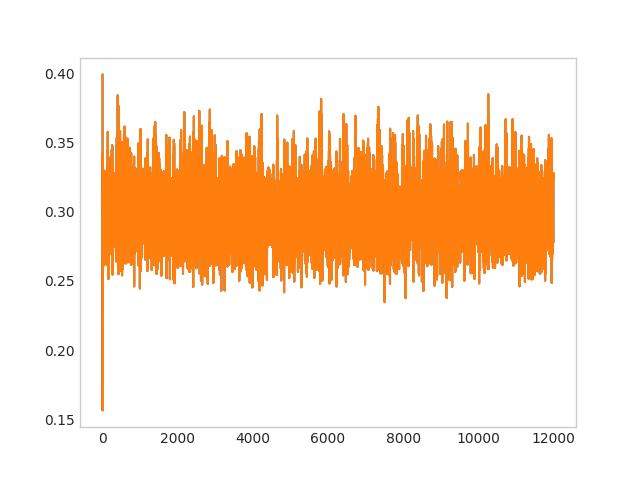

In [26]:
plt.plot(den1)
plt.plot(selfg.densities[1:])

In [3]:
L = 2250
b = 1.59
field = np.ones((L, L), dtype=int)
field[L//2, L//2] = 0

stat = [[0, L*L-field.sum(), 0, 0]]

# updater function
for i in tqdm(range(1, 1500)):
    field_ = evolve(field, b, 1)
    unique, counts = np.unique(field_ + 2*(field_-field), return_counts=True)
    r = dict(zip(unique, counts))
    stat.append([i, L*L-field_.sum(), r.get(-2, 0), r.get(3, 0)])
    field = field_.copy()    

100%|██████████| 1499/1499 [50:49<00:00,  2.46s/it]


<IPython.core.display.Javascript object>


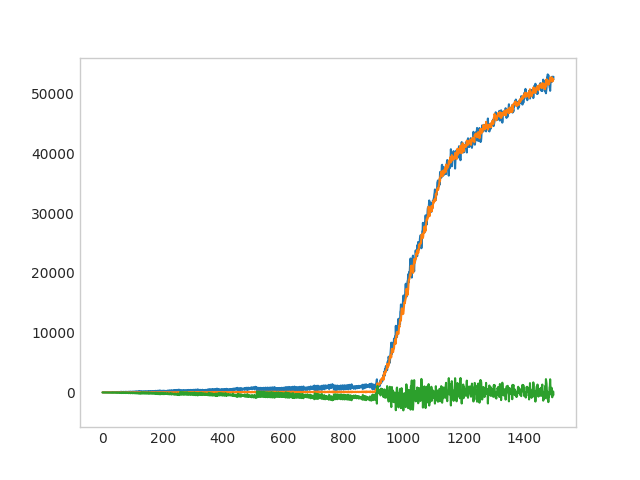

In [6]:
plt.plot((np.array(stat)[:, 2]/8).flat)
plt.plot((np.array(stat)[:, 3]/8).flat)
plt.plot(np.asarray(np.array(stat)[:, 3].flat)/8-np.asarray(np.array(stat)[:, 2].flat)/8)

In [7]:
print("t\t#D\tdD\tdC")
for s in np.asarray(stat).astype("long")[np.power(2, np.arange(11))]:
    print(f"{s[0]}\t{s[1]}\t{s[2]}\t{s[3]}")

t	#D	dD	dC
1	9	8	0
2	25	16	0
4	69	24	0
8	265	72	0
16	1041	168	0
32	4109	392	0
64	16389	840	0
128	65525	1736	0
256	262101	3528	0
512	1048469	7112	0
1024	3655101	179272	156272


In [ ]:
print("t\t#D\tdD\tdC")
for s in stat:
    print(f"{s[0]}\t{s[1]}\t{s[2]}\t{s[3]}")

In [9]:
unique, counts = np.unique(field_ + 2*(field_-field), return_counts=True)

In [17]:
unique, counts

(array([-2,  0,  1]), array([    8,     1, 39991]))

In [6]:
plt.imshow(field)

In [32]:
field.sum()/400./400.

0.28165

<IPython.core.display.Javascript object>


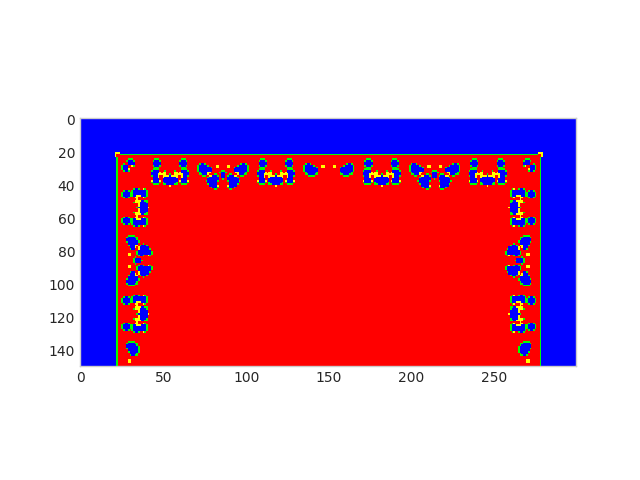

100%|██████████| 129/129 [13:31<00:00,  9.83s/it]


In [3]:
L = 300
p_c_ = .5
b = 1.59
field = np.ones((L, L), dtype=int)
field[L//2, L//2] = 0


plt.imshow(make_rgb(field)[:L//2+1, :], animated=True, cmap=plt.get_cmap('Paired'))
plt.savefig("snapshots/0", dpi=500, quality=95)
for i in tqdm(range(1, 130)):
    field_ = evolve(field, b, 1)
    coll = make_rgb(field_ + 2*(field_-field))
    field = field_.copy()
    plt.imshow(coll[:L//2, :], animated=True, cmap=plt.get_cmap('Paired'))
    plt.savefig(f"snapshots/{i}", dpi=300, quality=95)

In [3]:
L = 5000
b = 1.59
field = np.ones((L, L), dtype=int)
field[L//2, L//2] = 0
dens = []

# updater function
for i in tqdm(range(1, 1000)):
    if (L//2-i-4 > 0) and (L//2+i+5) < L-1:
        field[L//2-i-4:L//2+i+5, L//2-i-4:L//2+i+5] = evolve(field[L//2-i-4:L//2+i+5, L//2-i-4:L//2+i+5], b, 1)
    else:
        field = evolve(field, b, 1)
    dens.append((L*L-field.sum())/np.power((2*i+1), 2))

100%|██████████| 999/999 [05:51<00:00,  1.10it/s]


In [9]:
dens = dens[:1000]

In [15]:
dens_m = []
for i in range(1, 1000):
    T = np.power(2, np.floor(np.log2(i)))
    t = i - T
    dens_m.append(4*(2*T-2*t-1)*(2+3/4*t)/np.power(2*T+2*t+1, 2))

<IPython.core.display.Javascript object>


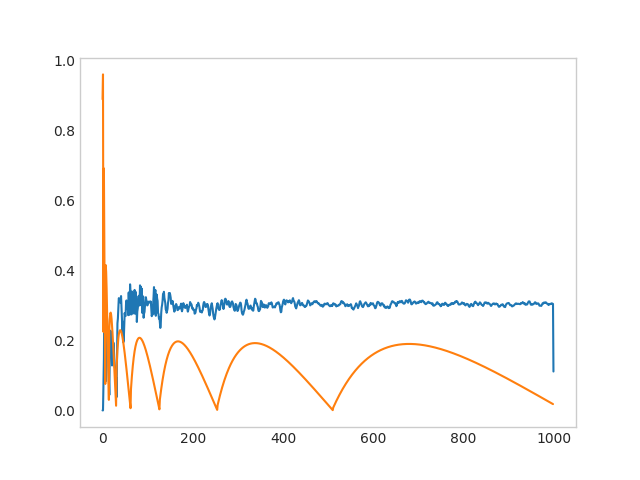

In [16]:
plt.plot(1-np.array(dens), label = "Experiment")
plt.plot(dens_m, label="Theory")

In [17]:
np.mean(dens_m[256:512])

0.12302882446511784

In [16]:
np.mean(1-np.array(dens[256:512]))

0.30166617415918656

<IPython.core.display.Javascript object>


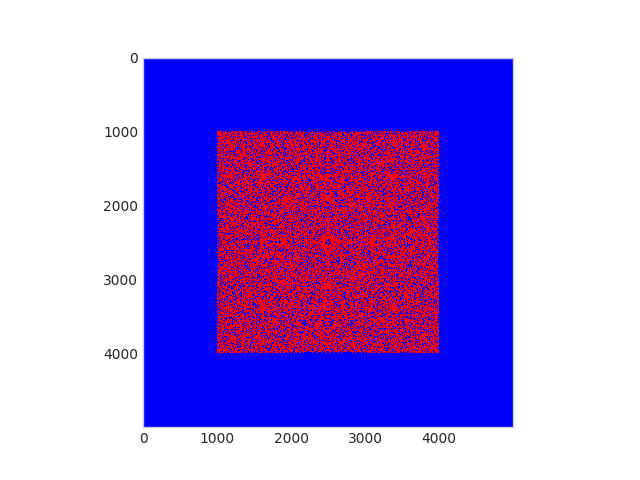

In [18]:
plt.imshow(make_rgb(field))

In [20]:
for i in 1-np.array(dens)[:500]:
    print(i)

0.0
0.0
0.08163265306122447
0.14814814814814814
0.3305785123966942
0.21301775147928992
0.14222222222222225
0.08304498269896199
0.2548476454293629
0.2902494331065759
0.2570888468809074
0.19199999999999995
0.1920438957475995
0.1284185493460166
0.0915712799167534
0.0440771349862259
0.16000000000000003
0.22790357925493065
0.22616699539776464
0.19036287923854844
0.1752298539751217
0.1283950617283951
0.1448619284744228
0.14827155351936694
0.19377162629757783
0.17799928800284803
0.15338842975206612
0.12311480455524781
0.1218040792875611
0.08814834721848963
0.09473418997228522
0.037869822485207094
0.14257072844731566
0.24868725057760976
0.2626463003372347
0.2957402889848002
0.32071111111111106
0.3184348119413054
0.30956577471559044
0.3084895595183661
0.31876905211206275
0.32664359861591696
0.2964724534284582
0.2615831334427471
0.21929718633015338
0.25343970401202454
0.1945706371191136
0.20108406844510573
0.24038363432302823
0.2780119596118028
0.2707135451032142
0.2695691609977324
0.30395667743

In [3]:
L = 5000
b = 1.59
field = np.ones((L, L), dtype=int)
field[L//2, L//2] = 0
# dens = []

# updater function
for i in tqdm(range(1, 2501)):
    field = evolve_old(field, b, 1)
#     dens.append((L*L-field.sum())/np.power((2*i+1), 2))

 50%|█████     | 1259/2500 [13:52<56:50,  2.75s/it]

KeyboardInterrupt: 

In [8]:
plt.imshow(field)

<IPython.core.display.Javascript object>


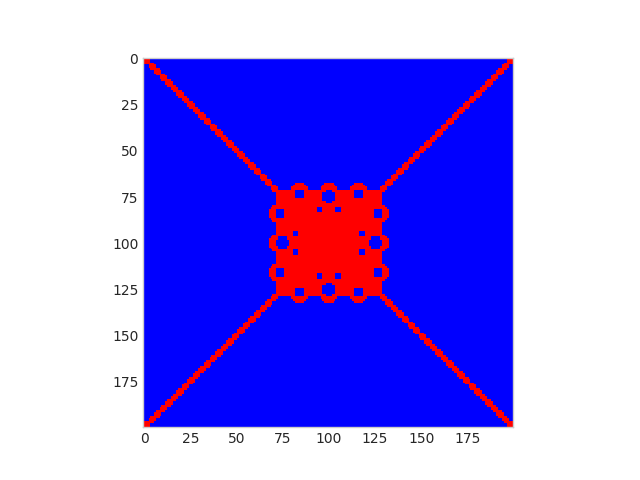

In [7]:
L = 200
p_c_ = .5
b = 1.81
# np.random.seed(45)
# field = np.random.choice((0, 1), (L, L), p=(1-p_c_, p_c_))
field = np.ones((L, L), dtype=int)
# field[30:32, 30:32] = np.zeros((2, 2), dtype=int)
field[L//2, L//2] = 0

# time_text = plt.text(2, 6, "0")
# draw the initial field
fig = plt.figure()
im = plt.imshow(make_rgb(field), animated=True, cmap=plt.get_cmap('Paired'))
# ax.grid(False)

# updater function
def updatefig(frame):
    if frame < 3:
        return im,
    global field
    if (L//2-i-4 > 0) and (L//2+i+5) < L-1:
        field_[L//2-i-4:L//2+i+5, L//2-i-4:L//2+i+5] = evolve(field[L//2-i-4:L//2+i+5, L//2-i-4:L//2+i+5], b, 1)
    else:
        field_ = evolve(field, b, 1)
    coll = make_rgb(field_ + 2*(field_-field))
    field = field_.copy()
    im.set_array(coll)
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=150, blit=True)

plt.show()

<IPython.core.display.Javascript object>


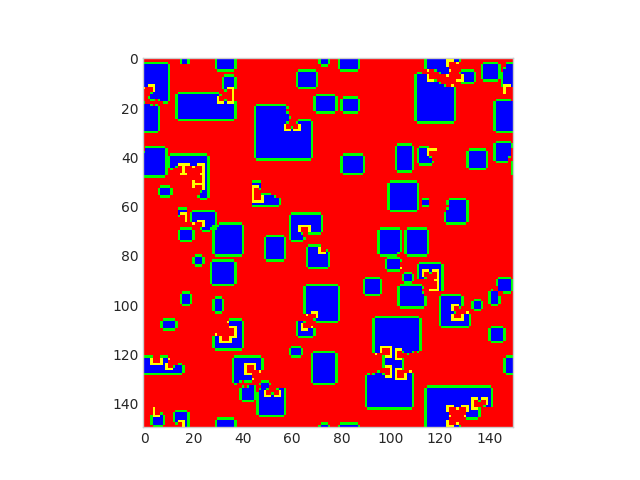

In [4]:
L = 150
p_c_ = .9
b = 1.62
np.random.seed(45)
field = np.random.choice((0, 1), (L, L), p=(1-p_c_, p_c_))
# field = np.ones((L, L), dtype=int)
# field[30:32, 30:32] = np.zeros((2, 2), dtype=int)
# field[L//2, L//2] = 0

# time_text = plt.text(2, 6, "0")
# draw the initial field
fig = plt.figure()
im = plt.imshow(make_rgb(field), animated=True, cmap=plt.get_cmap('Paired'))
# ax.grid(False)

# updater function
def updatefig(frame):
    if frame < 3:
        return im,
    global field
    field_ = evolve(field, b, 1)
    coll = make_rgb(field_ + 2*(field_-field))
    field = field_.copy()
    im.set_array(coll)
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=300, interval=150, blit=True)
anim.save("onedef.mp4", dpi=300)

In [ ]:
-2 - new defectors
0 - old defectors
1 - cooperators
3 - new cooperators

In [45]:
game = MeanGame(200, 1.54)
game.field = np.load("fields/field_200_10.npy")
game.evolve(5000)
game.evolve(5000)

In [47]:
livetimecoop = []
livetimedef = []
currlivetime = np.ones_like(game.field)

In [23]:
field = game.field.copy()

In [24]:
game.evolve(1)

In [26]:
(game.field + 2*(game.field-field)).min()

-2

In [48]:
for i in tqdm(range(1000)):
    field = game.field.copy()
    game.evolve(1)
    livetimecoop.extend(currlivetime[(game.field + 2*(game.field-field)) == -2].flatten().tolist())
    currlivetime[(game.field + 2*(game.field-field)) == -2] = 0
    livetimedef.extend(currlivetime[(game.field + 2*(game.field-field)) == 3].flatten().tolist())
    currlivetime[(game.field + 2*(game.field-field)) == 3] = 0
    currlivetime += 1

100%|██████████| 1000/1000 [00:10<00:00, 99.59it/s]


In [49]:
len(livetimecoop), len(livetimedef)

(3860336, 3860603)

In [51]:
np.array(livetimecoop[500000:]).mean(), np.array(livetimecoop[500000:]).std()

(5.320503663919323, 8.060826631566709)

In [52]:
np.array(livetimedef[500000:]).mean(), np.array(livetimedef[500000:]).std()

(5.0429253321502125, 5.524831525574225)

In [37]:
livetime[1000000:1000010]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [19]:
game = MeanGame(200, 1.625)
game.field = np.load("fields/field_200_10.npy")
game.evolve(5000)
game.evolve(5000)

In [20]:
pers = []
currlivetime = np.ones_like(game.field)

In [21]:
for i in tqdm(range(1000)):
    field = game.field.copy()
    game.evolve(1)
    currlivetime[(game.field + 2*(game.field-field)) == -2] = 0
    currlivetime[(game.field + 2*(game.field-field)) == 3] = 0
    pers.append(currlivetime.sum()/(1.*currlivetime.shape[0]*currlivetime.shape[1]))

100%|██████████| 1000/1000 [00:11<00:00, 88.09it/s]


<IPython.core.display.Javascript object>


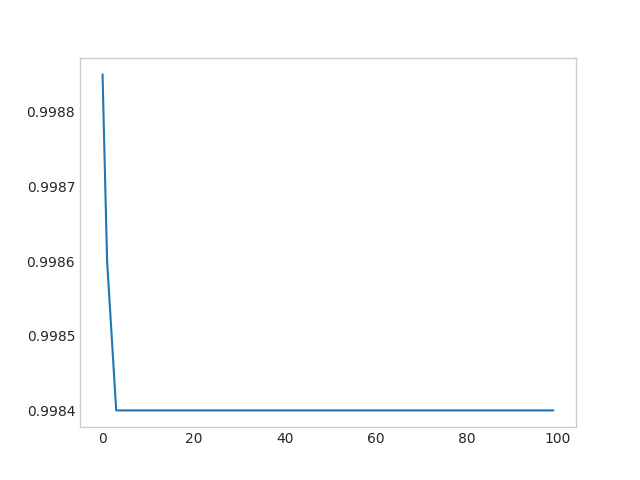

In [22]:
plt.plot(pers[:100])

In [25]:
40000 - pers[-1]*40000

64.0

In [18]:
game.densities[-1]

0.205675

In [61]:
np.array(livetimecoop[1000000:]).mean(), np.array(livetimecoop[1000000:]).std()

(3.807657503342326, 3.8642860480143035)

In [62]:
np.array(livetimedef[1000000:]).mean(), np.array(livetimedef[1000000:]).std()

(6.4426484895236, 6.050498194017273)

In [64]:
game = MeanGame(200, 1.6)
game.field = np.load("fields/field_200_10.npy")
game.evolve(5000)
game.evolve(5000)

In [65]:
livetimecoop = []
livetimedef = []
currlivetime = np.ones_like(game.field)

In [66]:
for i in tqdm(range(4000)):
    field = game.field.copy()
    game.evolve(1)
    livetimecoop.extend(currlivetime[(game.field + 2*(game.field-field)) == -2].flatten().tolist())
    currlivetime[(game.field + 2*(game.field-field)) == -2] = 0
    livetimedef.extend(currlivetime[(game.field + 2*(game.field-field)) == 3].flatten().tolist())
    currlivetime[(game.field + 2*(game.field-field)) == 3] = 0
    currlivetime += 1

100%|██████████| 4000/4000 [00:37<00:00, 107.14it/s]


In [67]:
np.array(livetimecoop[500000:]).mean(), np.array(livetimecoop[500000:]).std()

(3.3110866052822594, 2.850495605772853)

In [68]:
np.array(livetimedef[500000:]).mean(), np.array(livetimedef[500000:]).std()

(7.737820043902198, 7.195853654530644)